In [89]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, metrics
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Model
from keras.layers import Input, Dense, Activation, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from keras.datasets import mnist
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from PIL import Image

In [68]:
batch_size = 40
img_height = 200
img_width = 200

Keras dataset preprocessing utilities, located at tf.keras.preprocessing, help you go from raw data on disk to a tf.data.Dataset object that can be used to train a model.

See https://keras.io/api/preprocessing/

Once the dataset is preprocessed and loaded, it can be directly used in calls to model.fit



In [69]:
## loading training data
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset/MaskNoMask',
    validation_split=0.2,
    subset= "training",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size
)

Found 10368 files belonging to 2 classes.
Using 8295 files for training.


In [70]:
## loading testing data
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
"dataset/MaskNoMask",
    validation_split=0.2,
    subset= "validation",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size,

)

Found 10368 files belonging to 2 classes.
Using 2073 files for validation.


In [71]:
training_ds

<BatchDataset shapes: ((None, 200, 200, 3), (None,)), types: (tf.float32, tf.int32)>

In [72]:
class_names = training_ds.class_names

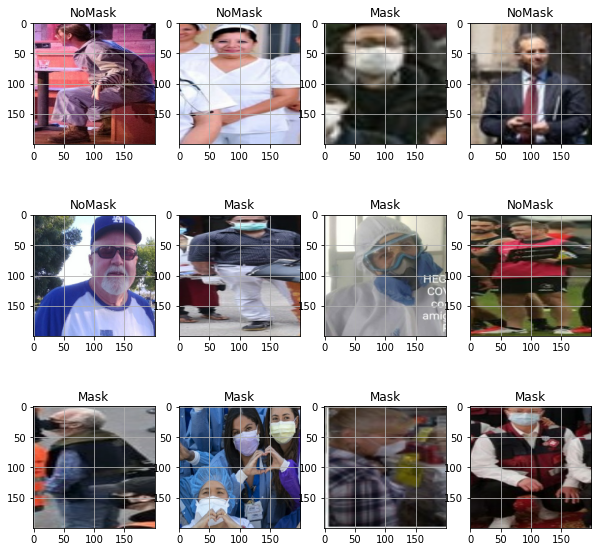

In [73]:
plt.figure(figsize=(10, 10))
for images, labels in training_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.grid(True)

In [87]:
## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Now build a deep neural network and train it and see how you do

In [129]:
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(1, activation='sigmoid'),
])

In [131]:

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
model.fit(training_ds,
  validation_data=testing_ds,
  epochs=10)

Epoch 1/10
208/208 [==============================] - 151s 726ms/step - loss: 0.6188 - accuracy: 0.6639 - recall_25: 0.5872 - precision_22: 0.6603 - val_loss: 0.5940 - val_accuracy: 0.7077 - val_recall_25: 0.7305 - val_precision_22: 0.6839
Epoch 2/10
208/208 [==============================] - 144s 693ms/step - loss: 0.5636 - accuracy: 0.7099 - recall_25: 0.6713 - precision_22: 0.6996 - val_loss: 0.5611 - val_accuracy: 0.7159 - val_recall_25: 0.7054 - val_precision_22: 0.7047
Epoch 3/10
208/208 [==============================] - 147s 708ms/step - loss: 0.5256 - accuracy: 0.7383 - recall_25: 0.7041 - precision_22: 0.7297 - val_loss: 0.5535 - val_accuracy: 0.7183 - val_recall_25: 0.7745 - val_precision_22: 0.6829
Epoch 4/10
208/208 [==============================] - 145s 695ms/step - loss: 0.4940 - accuracy: 0.7582 - recall_25: 0.7351 - precision_22: 0.7466 - val_loss: 0.5449 - val_accuracy: 0.7299 - val_recall_25: 0.7605 - val_precision_22: 0.7028
Epoch 5/10
208/208 [====================

In [132]:
f1_train = (2*(0.8957*0.8982)/(0.8957+0.8982))
f1_test = (2*(0.6156*0.7976)/(0.6156+0.7976))

In [133]:
print(f1_train)
print(f1_test)

0.896948257985395
0.6948804981602038


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()